# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 606


In [3]:
#verify that code ran successfully
print(cities[233])

lake city


In [4]:
base_url = f"https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID={weather_api_key}"
print(base_url)

https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=0bab3b5c406d499a94d0b25cdeeaf7a4


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
base_url = f"https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(e)
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mar del plata
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | tasiilaq
Processing Record 9 of Set 1 | tsihombe
'coord'
Processing Record 10 of Set 1 | leningradskiy
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | tilichiki
Processing Record 13 of Set 1 | arraial do cabo
Processing Record 14 of Set 1 | ahipara
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | valparaiso
Processing Record 17 of Set 1 | santa luzia
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | castro
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | samusu
'coord'
Processing Record 23 

Processing Record 42 of Set 4 | batagay-alyta
Processing Record 43 of Set 4 | isangel
Processing Record 44 of Set 4 | toliary
'coord'
Processing Record 45 of Set 4 | fairbanks
Processing Record 46 of Set 4 | sam roi yot
Processing Record 47 of Set 4 | ambilobe
Processing Record 48 of Set 4 | tumannyy
'coord'
Processing Record 49 of Set 4 | mount isa
Processing Record 0 of Set 5 | katsuura
Processing Record 1 of Set 5 | qasigiannguit
Processing Record 2 of Set 5 | roald
Processing Record 3 of Set 5 | victoria
Processing Record 4 of Set 5 | lebu
Processing Record 5 of Set 5 | constitucion
Processing Record 6 of Set 5 | high level
Processing Record 7 of Set 5 | camacha
Processing Record 8 of Set 5 | machakos
Processing Record 9 of Set 5 | bandarbeyla
Processing Record 10 of Set 5 | honiara
Processing Record 11 of Set 5 | lata
Processing Record 12 of Set 5 | diu
Processing Record 13 of Set 5 | muros
Processing Record 14 of Set 5 | westport
Processing Record 15 of Set 5 | dawei
Processing R

Processing Record 41 of Set 8 | cururupu
Processing Record 42 of Set 8 | goderich
Processing Record 43 of Set 8 | tautira
Processing Record 44 of Set 8 | vaitupu
'coord'
Processing Record 45 of Set 8 | jahazpur
Processing Record 46 of Set 8 | kidal
Processing Record 47 of Set 8 | koslan
Processing Record 48 of Set 8 | russell
Processing Record 49 of Set 8 | kuche
'coord'
Processing Record 0 of Set 9 | ngunguru
Processing Record 1 of Set 9 | thayetmyo
Processing Record 2 of Set 9 | kiunga
Processing Record 3 of Set 9 | chivilcoy
Processing Record 4 of Set 9 | khonuu
'coord'
Processing Record 5 of Set 9 | nanortalik
Processing Record 6 of Set 9 | celestun
Processing Record 7 of Set 9 | faanui
Processing Record 8 of Set 9 | am timan
Processing Record 9 of Set 9 | nisia floresta
Processing Record 10 of Set 9 | san luis
Processing Record 11 of Set 9 | grand-santi
Processing Record 12 of Set 9 | kodiak
Processing Record 13 of Set 9 | luanda
Processing Record 14 of Set 9 | tokmak
Processing R

Processing Record 37 of Set 12 | yatou
Processing Record 38 of Set 12 | senanga
Processing Record 39 of Set 12 | sao joao da barra
Processing Record 40 of Set 12 | aitape
Processing Record 41 of Set 12 | marzuq
Processing Record 42 of Set 12 | minggang
Processing Record 43 of Set 12 | cody
Processing Record 44 of Set 12 | berlevag
Processing Record 45 of Set 12 | juifang
'coord'
Processing Record 46 of Set 12 | blacksburg
Processing Record 47 of Set 12 | tabriz
Processing Record 48 of Set 12 | port-gentil
Processing Record 49 of Set 12 | paciran
Processing Record 0 of Set 13 | poya
Processing Record 1 of Set 13 | san pedro buenavista
Processing Record 2 of Set 13 | bambanglipuro
Processing Record 3 of Set 13 | san javier
Processing Record 4 of Set 13 | arman
Processing Record 5 of Set 13 | klyuchi
-----------------------------
Data Retrieval Complete      
-----------------------------


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)                       
                          
# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mar del plata,-38.0023,-57.5575,6.72,72,0,3.09,AR,1686710353
1,rikitea,-23.1203,-134.9692,22.09,67,62,4.49,PF,1686710498
2,albany,42.6001,-73.9662,16.07,79,95,0.95,US,1686710473
3,ushuaia,-54.8000,-68.3000,5.81,65,75,1.54,AR,1686710517
4,busselton,-33.6500,115.3333,15.08,69,57,4.66,AU,1686710496


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output data/mod_6_cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output data/mod_6_cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mar del plata,-38.0023,-57.5575,6.72,72,0,3.09,AR,1686710353
1,rikitea,-23.1203,-134.9692,22.09,67,62,4.49,PF,1686710498
2,albany,42.6001,-73.9662,16.07,79,95,0.95,US,1686710473
3,ushuaia,-54.8000,-68.3000,5.81,65,75,1.54,AR,1686710517
4,busselton,-33.6500,115.3333,15.08,69,57,4.66,AU,1686710496


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

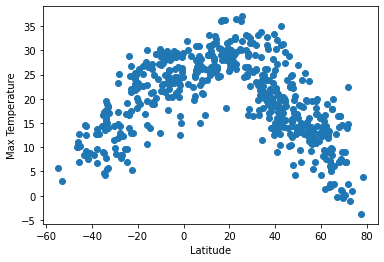

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("output data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

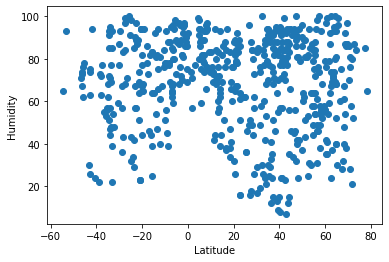

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

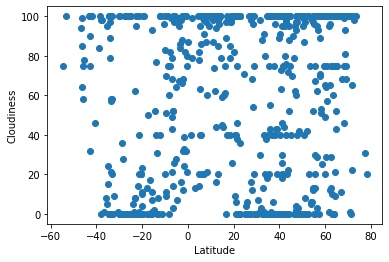

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

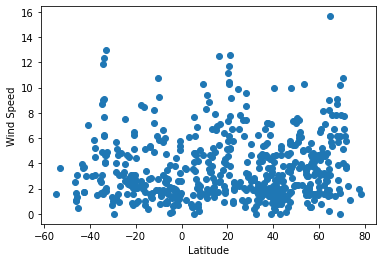

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hem_df = pd.DataFrame(city_data_df[city_data_df.Lat >0])

# Display sample data
north_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,albany,42.6001,-73.9662,16.07,79,95,0.95,US,1686710473
6,hilo,19.7297,-155.0900,25.85,76,100,5.14,US,1686710362
7,tasiilaq,65.6145,-37.6368,6.09,99,100,5.36,GL,1686710568
8,leningradskiy,69.3833,178.4167,-0.22,97,100,10.23,RU,1686710678
9,qaanaaq,77.4840,-69.3632,-3.77,85,31,1.96,GL,1686710500


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hem_df = pd.DataFrame(city_data_df[city_data_df.Lat <0])

# Display sample data
south_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mar del plata,-38.0023,-57.5575,6.72,72,0,3.09,AR,1686710353
1,rikitea,-23.1203,-134.9692,22.09,67,62,4.49,PF,1686710498
3,ushuaia,-54.8000,-68.3000,5.81,65,75,1.54,AR,1686710517
4,busselton,-33.6500,115.3333,15.08,69,57,4.66,AU,1686710496
5,vaini,-21.2000,-175.2000,24.09,69,40,2.06,TO,1686710576


In [67]:
# Define a function to create Linear Regression plots

def linear_regression(x,y):
    p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x,y)
    p_y = p_slope * x + p_int
    plt.plot(x,p_y,"--")
    plt.scatter(x,y)
    line_eq = "y = " + str(round(p_slope,2)) + "x + " + str(round(p_int,2))
    plt.annotate(line_eq,(5.8,0.8),xytext=(-5,8),fontsize=15,color="red")

###  Temperature vs. Latitude Linear Regression Plot

Text(0, 0.5, 'Latitude')

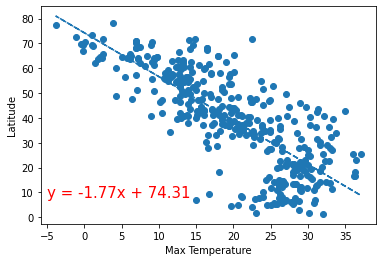

In [68]:
# Linear regression on Northern Hemisphere
linear_regression(north_hem_df["Max Temp"],north_hem_df["Lat"])
plt.xlabel("Max Temperature")
plt.ylabel("Latitude")

Text(0, 0.5, 'Latitude')

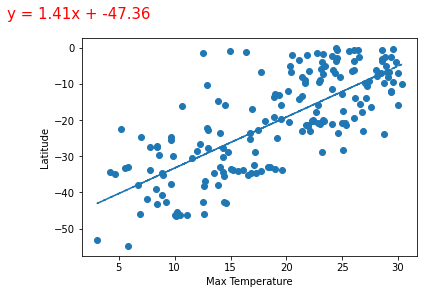

In [69]:
# Linear regression on Southern Hemisphere
linear_regression(south_hem_df["Max Temp"],south_hem_df["Lat"])
plt.xlabel("Max Temperature")
plt.ylabel("Latitude")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

Text(0, 0.5, 'Latitude')

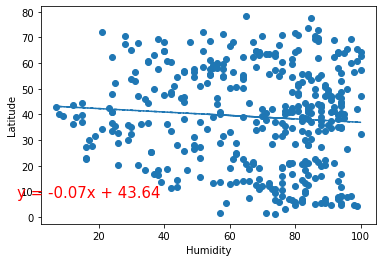

In [70]:
# Northern Hemisphere
linear_regression(north_hem_df["Humidity"],north_hem_df["Lat"])
plt.xlabel("Humidity")
plt.ylabel("Latitude")

Text(0, 0.5, 'Latitude')

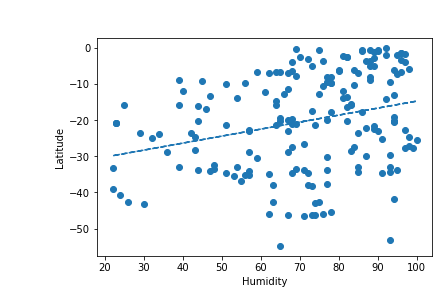

In [71]:
# Southern Hemisphere
linear_regression(south_hem_df["Humidity"],south_hem_df["Lat"])
plt.xlabel("Humidity")
plt.ylabel("Latitude")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

Text(0, 0.5, 'Latitude')

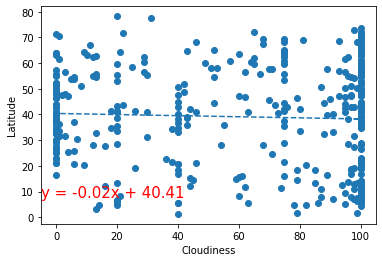

In [72]:
# Northern Hemisphere
linear_regression(north_hem_df["Cloudiness"],north_hem_df["Lat"])
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")

Text(0, 0.5, 'Latitude')

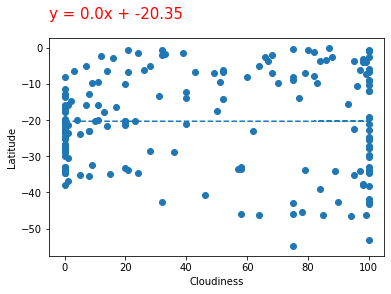

In [73]:
# Southern Hemisphere
linear_regression(south_hem_df["Cloudiness"],south_hem_df["Lat"])
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

Text(0, 0.5, 'Latitude')

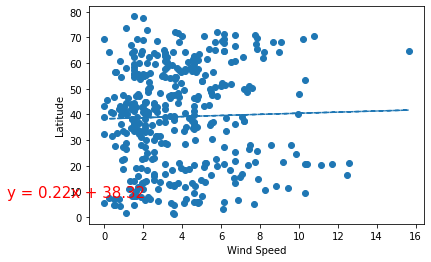

In [74]:
# Northern Hemisphere
linear_regression(north_hem_df["Wind Speed"],north_hem_df["Lat"])
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")

Text(0, 0.5, 'Latitude')

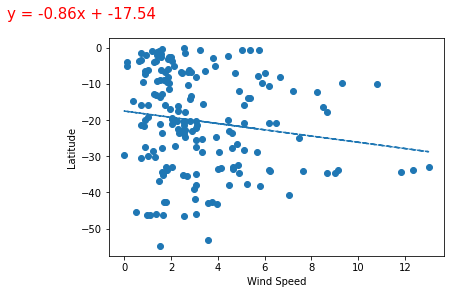

In [75]:
# Southern Hemisphere
linear_regression(south_hem_df["Wind Speed"],south_hem_df["Lat"])
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")

**Discussion about the linear relationship:** YOUR RESPONSE HERE